In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [10]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [7]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
data.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [14]:
numerical_features = data.select_dtypes(include=[np.number])

In [15]:
numerical_features.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


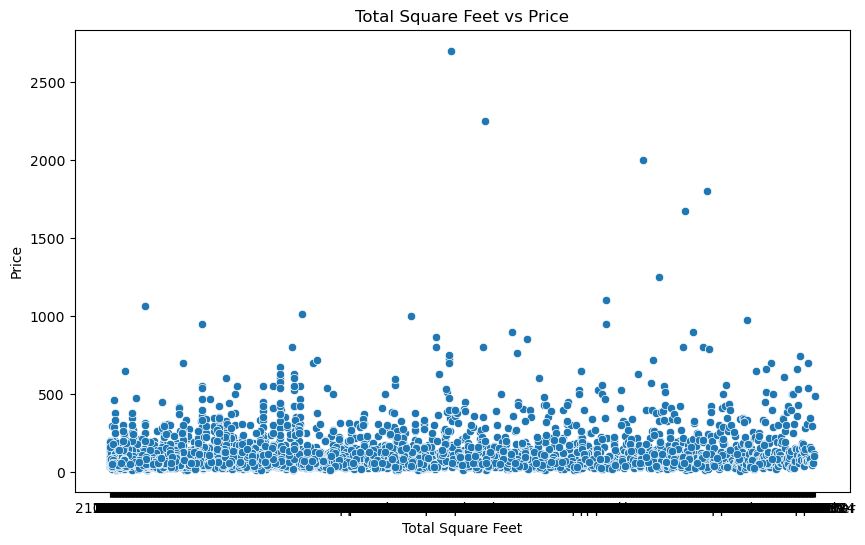

In [17]:
# Explore the relationship between features and the target variable
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Total Square Feet vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

In [18]:

# Scale numerical features
scaler = StandardScaler()

In [19]:
numerical_features_scaled = scaler.fit_transform(numerical_features)

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
# Split the data into training and testing setsSS
X_train, X_test, y_train, y_test = train_test_split(numerical_features_scaled, data['price'], test_size=0.3, random_state=42)

In [23]:
X_train

array([[ 0.61473303, -0.80753266, -0.06507323],
       [ 1.74971795,  0.47439551,  0.64666743],
       [-0.52025189,  0.47439551, -0.27385049],
       ...,
       [-0.52025189, -0.80753266, -0.57942448],
       [-1.65523682, -0.80753266, -0.69140501],
       [-0.52025189, -0.80753266,  0.0772749 ]])

In [24]:
y_train

12769     90.0
5852     165.0
9989      68.0
5011      60.0
8088      75.0
         ...  
9286      79.0
9340      88.0
9628      35.8
1491      24.0
12929    105.0
Name: price, Length: 5247, dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Train the SVM Regressor
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
svm_regressor = SVR(kernel='rbf')
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [27]:
 grid_search.best_params_

{'C': 100, 'gamma': 0.001}

In [28]:
# Predict on the testing data
y_pred = grid_search.predict(X_test)

In [29]:
y_pred

array([ 70.06136253,  55.42539187, 123.33381461, ...,  60.91621173,
       201.21362914,  38.83391735])

In [30]:
y_test

11487     70.00
9707      55.47
11764    122.50
10458     36.00
8572      62.35
          ...  
6725      60.00
2141      85.00
7045      61.00
8137     201.00
11969     38.46
Name: price, Length: 2249, dtype: float64

In [31]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
mse

61.84949001612691

In [33]:
r2

0.9937785801740191